# Prova Data Science N1

## <font color='red'>Importante: a prova é individual.</font>

**Instruções:**

1. Faça download deste notebook e carregue o mesmo na sua conta do Google Colab.
2. Responda às questões propostas.
3. Crie um repositório para o notebook, "commite" o notebook neste repositório.
4. Na tarefa de avaliação do Teams, envie o link do repositório. Arquivos enviados diretamente no Teams não serão considerados.
5. Commits no repositório após a data de entrega (combinada em sala de aula) serão desconsiderados.

# Objeto da avaliação

Você irá fazer o download do arquivo de dados matches.csv do [repositório do Github](https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv)

Todas as questões/atividades serão realizadas com base neste arquivo. É importante que você responda aos questionamentos propostos o mais completo possível, com a maior quantidade de detalhes que você conseguir incluir.

Não se contente com o básico, seja criativo nas respostas, indo além do tradicional.

## **Importante!!**

Antes de começar a responder, abra o arquivo de dados e entenda o dataset. Não será fornecido um dicionário de dados, é sua tarefa analisar o dataset e "inferir" o que são as colunas e a sua organização.

## Instalação de bibliotecas necessárias

Instale neste local todas as bibliotecas necessárias para resolução da avaliação.

In [ ]:
!pip install pandas-profiling
!pip install sweetviz

In [ ]:
import sweetviz as sv
import pandas as pd

df = pd.read_csv('/content/matches.csv')

report = sv.analyze(df)
report.show_html(filepath='Sweetviz_Report.html')

                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/graph.py:33: UserWarning:

Glyph 9670 (\N{BLACK DIAMOND}) missing from current font.



Report Sweetviz_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Estatísticas básicas do dataset


Carregue o arquivo de dados no notebook e exiba as características básicas do arquivo (shape, tipo de dados, dados ausentes, estatísticas básicas dos dados, etc)

In [ ]:
import pandas as pd

file_path = '/content/matches.csv'
df = pd.read_csv(file_path)

# Verificar todas as colunas do dataset para garantir que 'captain' esteja presente
print("Colunas disponíveis no dataset:")
print(df.columns)

dataset_shape = df.shape
print("\nDimensões do Dataset:", dataset_shape)

data_types = df.dtypes
print("\nTipos de dados de cada coluna:")
print(data_types)

missing_data = df.isnull().sum()
print("\nDados ausentes em cada coluna:")
print(missing_data)

statistics_summary = df.describe()
print("\nResumo estatístico:")
print(statistics_summary)

Colunas disponíveis no dataset:
Index(['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist',
       'fk', 'pk', 'pkatt', 'season', 'team'],
      dtype='object')

Dimensões do Dataset: (1389, 28)

Tipos de dados de cada coluna:
Unnamed: 0        int64
date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64

## Dia da semana com placares mais altos

Crie um gráfico que responda em qual dia da semana os placares foram mais altos. O conceito de "placar mais alto" é a soma dos gols feitos no jogo.

Como a quantidade de jogos não é a mesma em todos os dias da semana (finais de semana tendem a ter mais jogos que em dias da semana - o que resultaria em placares mais altos nestes dias), você deverá encontrar uma forma de equalizar esta diferença na quantidade de jogos.

A resposta deverá ser um gráfico que demonstre claramente o comparativo dos dias.

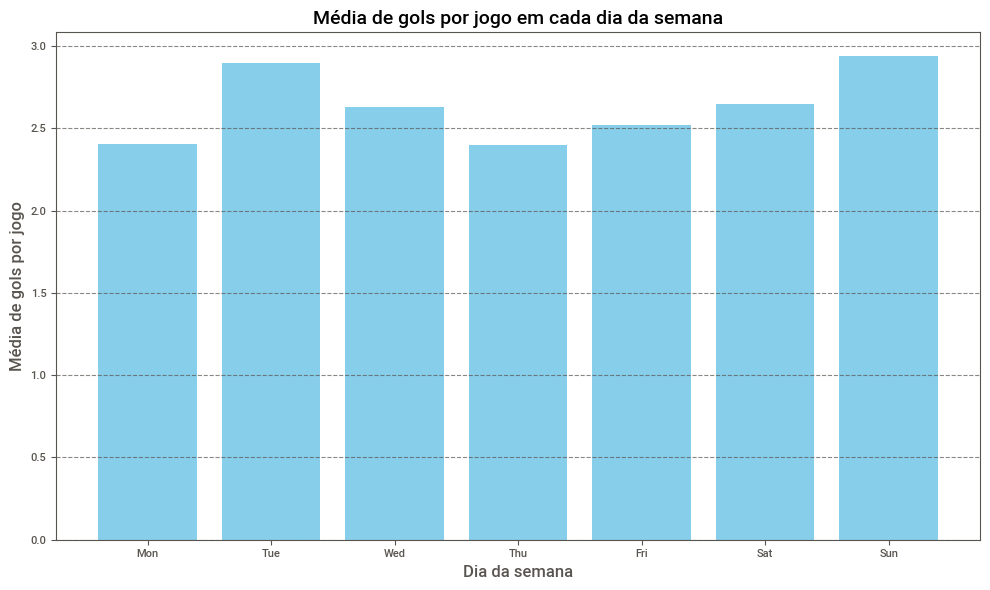

In [ ]:
import matplotlib.pyplot as plt

df['total_goals'] = df['gf'] + df['ga']

avg_goals_per_day = df.groupby('day')['total_goals'].mean()

ordered_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
avg_goals_per_day = avg_goals_per_day.reindex(ordered_days)

plt.figure(figsize=(10, 6))
plt.bar(avg_goals_per_day.index, avg_goals_per_day.values, color='skyblue')
plt.title('Média de gols por jogo em cada dia da semana', fontsize=14)
plt.xlabel('Dia da semana', fontsize=12)
plt.ylabel('Média de gols por jogo', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

## Capitães

Quantos capitães diferentes cada equipe teve durante a temporada?

Responda em forma de um gráfico comparativo, apresentando os dados o mais claramente possível.

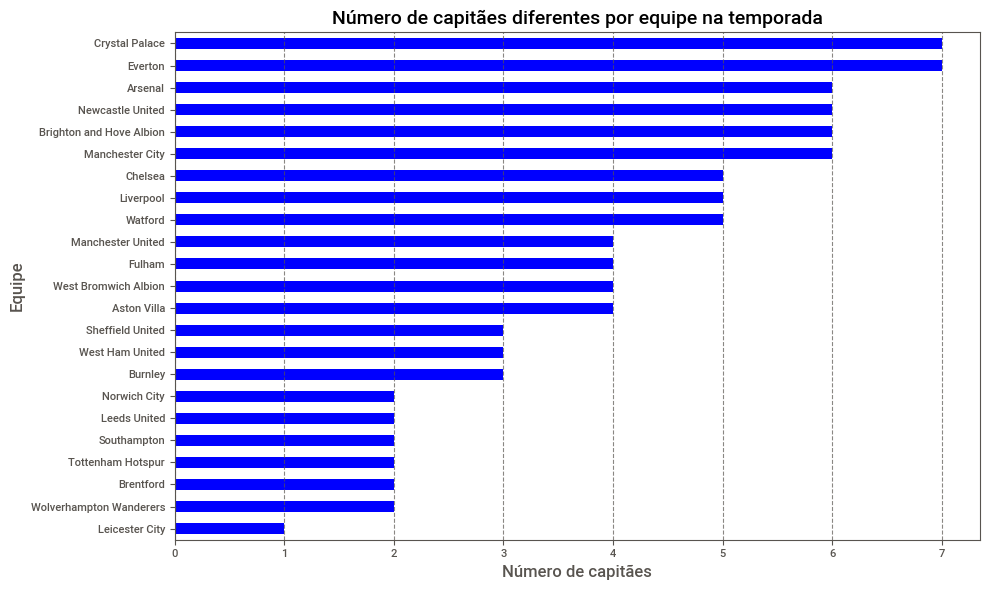

In [ ]:
captains_per_team = df.groupby('team')['captain'].nunique()

plt.figure(figsize=(10, 6))
captains_per_team.sort_values().plot(kind='barh', color='blue')
plt.title('Número de capitães diferentes por equipe na temporada', fontsize=14)
plt.xlabel('Número de capitães', fontsize=12)
plt.ylabel('Equipe', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

O maior número de capitães que uma equipe teve, foi 7.

## Formação Tática

Qual a formação tática mais comum para cada equipe de acordo com o resultado obtido (Ex: para vitórias, a formação mais comum é X, para empates Y e para Z em derrotas).

**Importante** responda de forma que seja possível fazer comparativos entre equipes.

Responda com um gráfico.

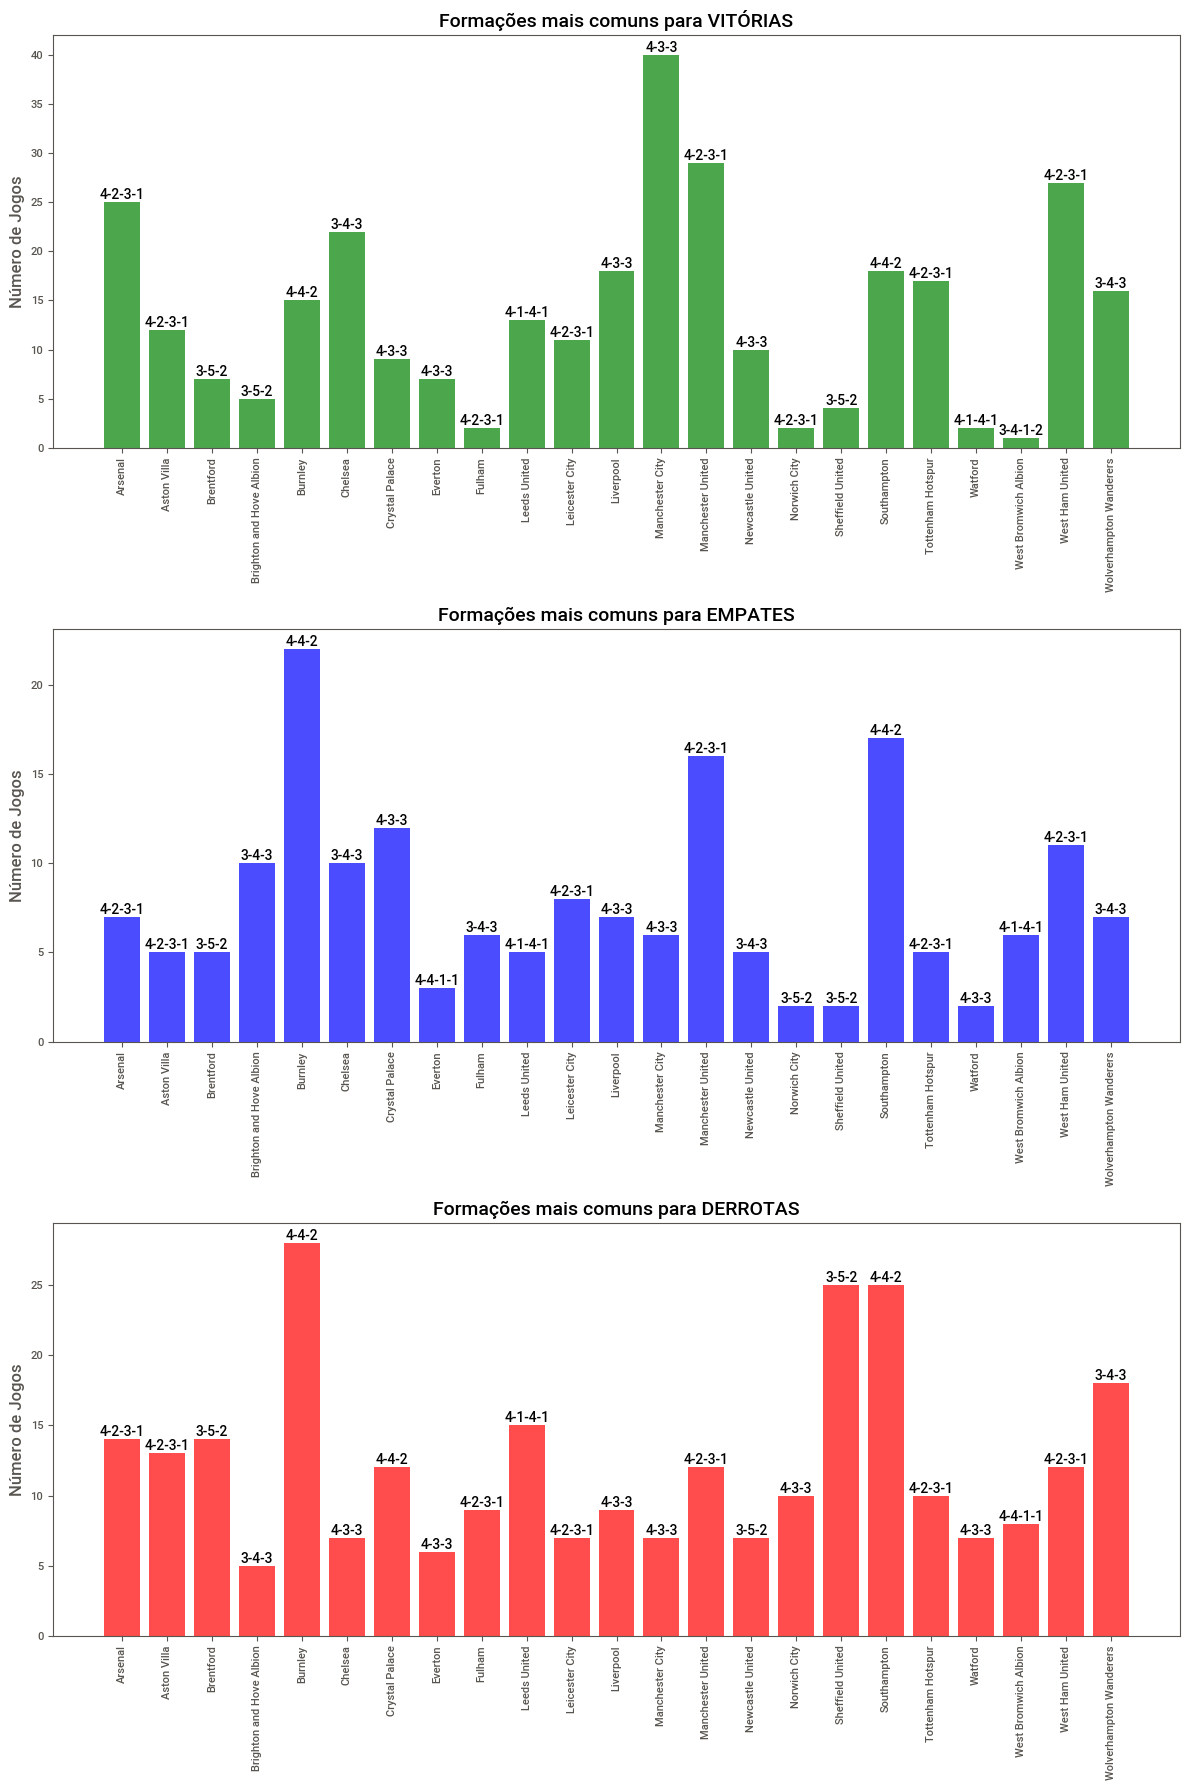

In [ ]:
formation_by_team_result = df.groupby(['team', 'result', 'formation']).size().reset_index(name='count')

most_common_formation = formation_by_team_result.loc[formation_by_team_result.groupby(['team', 'result'])['count'].idxmax()]

result_colors = {'W': 'green', 'D': 'blue', 'L': 'red'}

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# Gráfico para vitórias
subset_w = most_common_formation[most_common_formation['result'] == 'W']
axes[0].bar(subset_w['team'], subset_w['count'], color=result_colors['W'], alpha=0.7)
axes[0].set_title('Formações mais comuns para VITÓRIAS', fontsize=14)
axes[0].set_ylabel('Número de Jogos', fontsize=12)
axes[0].set_xticks(range(len(subset_w['team'])))
axes[0].set_xticklabels(subset_w['team'], rotation=90)
for bar, formation in zip(axes[0].patches, subset_w['formation']):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, formation, ha='center', va='bottom', fontsize=10)

# Gráfico para empates
subset_d = most_common_formation[most_common_formation['result'] == 'D']
axes[1].bar(subset_d['team'], subset_d['count'], color=result_colors['D'], alpha=0.7)
axes[1].set_title('Formações mais comuns para EMPATES', fontsize=14)
axes[1].set_ylabel('Número de Jogos', fontsize=12)
axes[1].set_xticks(range(len(subset_d['team'])))
axes[1].set_xticklabels(subset_d['team'], rotation=90)
for bar, formation in zip(axes[1].patches, subset_d['formation']):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height, formation, ha='center', va='bottom', fontsize=10)

# Gráfico para derrotas
subset_l = most_common_formation[most_common_formation['result'] == 'L']
axes[2].bar(subset_l['team'], subset_l['count'], color=result_colors['L'], alpha=0.7)
axes[2].set_title('Formações mais comuns para DERROTAS', fontsize=14)
axes[2].set_ylabel('Número de Jogos', fontsize=12)
axes[2].set_xticks(range(len(subset_l['team'])))
axes[2].set_xticklabels(subset_l['team'], rotation=90)
for bar, formation in zip(axes[2].patches, subset_l['formation']):
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width() / 2, height, formation, ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## Posse de bola

Qual a média de posse de bola da equipe mandante quando ela perdeu o jogo?

Responda em forma de gráfico para poder comparar entre todas as equipes.

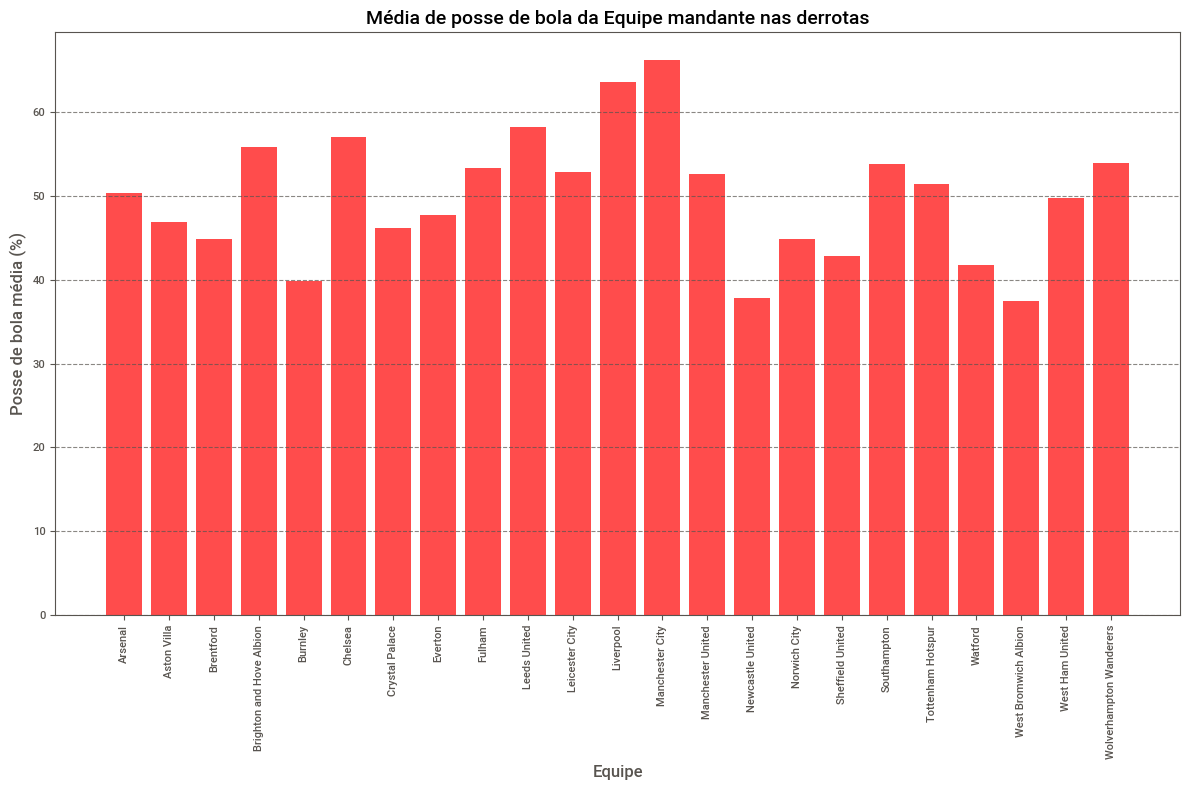

In [ ]:
# Filtrar os dados para equipes que jogaram como mandantes e perderam (result = 'L')
home_losses = df[(df['venue'] == 'Home') & (df['result'] == 'L')]

avg_possession_home_losses = home_losses.groupby('team')['poss'].mean().reset_index(name='avg_possession')

plt.figure(figsize=(12, 8))
plt.bar(avg_possession_home_losses['team'], avg_possession_home_losses['avg_possession'], color='red', alpha=0.7)

plt.title('Média de posse de bola da Equipe mandante nas derrotas', fontsize=14)
plt.xlabel('Equipe', fontsize=12)
plt.ylabel('Posse de bola média (%)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

O gráfico mostra a média de posse de bola das equipes mandantes quando perderam o jogo.
É possivel comparar entre as diferentes equipes o quanto elas mantiveram a posse de bola, mesmo nas partidas que resultaram em derrota.

## Classificação

Qual a classificação final do campeonato?

Responda em forma de tabela, ordenada do primeiro colocado ao último.
Você deverá apresentar o brasão do time (pode ser obtido online [aqui](https://logodetimes.com/premier-league/), mas automatize a busca, não salve o logo localmente), o nome, a quantidade de pontos e a posição final no campeonato.

**OBS** Vitória vale 3 pontos, empates 1 ponto e derrota 0 pontos.

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from IPython.display import HTML

df['points'] = df['result'].map({'W': 3, 'D': 1, 'L': 0})

team_results = df.groupby('team')['points'].sum().reset_index()

team_results_sorted = team_results.sort_values(by='points', ascending=False).reset_index(drop=True)

team_results_sorted['position'] = team_results_sorted.index + 1

# Scraping para buscar os logos dos times do site https://logodetimes.com/premier-league/
url = 'https://logodetimes.com/premier-league/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

team_logos = {}

# Iterar sobre as imagens encontradas e associá-las ao time correspondente
for img in soup.find_all('img'):
    alt_text = img.get('alt')  # Nome do time
    img_url = img.get('src')   # URL do logo
    team_logos[alt_text] = img_url

# Mapear os logos dinamicamente no DataFrame
team_results_sorted['logo_url'] = team_results_sorted['team'].map(team_logos)

# Função para exibir a tabela com os logos
def create_table_with_logos(df):
    table_html = '<table>'
    table_html += '<tr><th>Posição</th><th>Brasão</th><th>Time</th><th>Pontos</th></tr>'
    for _, row in df.iterrows():
        table_html += f'<tr>'
        table_html += f'<td>{row["position"]}</td>'
        if row['logo_url']:
            table_html += f'<td><img src="{row["logo_url"]}" width="50" height="50"></td>'
        else:
            table_html += f'<td>Logo não disponível</td>'
        table_html += f'<td>{row["team"]}</td>'
        table_html += f'<td>{row["points"]}</td>'
        table_html += f'</tr>'
    table_html += '</table>'
    return HTML(table_html)

create_table_with_logos(team_results_sorted)

Posição,Brasão,Time,Pontos
1,,Manchester City,166
2,,Chelsea,132
3,,Manchester United,128
4,,Arsenal,121
5,,Tottenham Hotspur,120
6,,West Ham United,117
7,,Leicester City,108
8,,Wolverhampton Wanderers,94
9,,Leeds United,93
10,,Aston Villa,92


## Público

Crie uma visualização que apresente o público total de cada equipe, e também um detalhamento por jogos.

Apresentar os dados usando a técnica "DrillDown" será considerado um "plus". A visualização DrillDown permite que gráficos sejam detalhados com cliques em itens do gráfico.

Um exemplo com tabelas pode ser encontrado [aqui](https://dash.plotly.com/dash-ag-grid/enterprise-master-detail).

Um exemplo usando gráficos pode ser encontrado [aqui](https://community.plotly.com/t/show-and-tell-drill-down-functionality-in-dash-using-callback-context/54403?u=atharvakatre)

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Somar o público total por equipe
publico_total_por_equipe = df.groupby('team')['attendance'].sum().reset_index()

fig = px.bar(publico_total_por_equipe, x='team', y='attendance',
             title='Público Total por Equipe', labels={'attendance': 'Público Total', 'team': 'Equipe'})

def drilldown(team):
    publico_por_jogo = df[df['team'] == team][['date', 'attendance']].reset_index(drop=True)
    fig_drilldown = px.bar(publico_por_jogo, x='date', y='attendance',
                           title=f'Público por Jogo - {team}', labels={'attendance': 'Público', 'date': 'Data'})
    fig_drilldown.show()

fig.show()